In [1]:

import matplotlib.pyplot as plt
from matplotlib import rc  ### 이 줄과
rc('font', family='AppleGothic') 			## 이 두 줄을 
plt.rcParams['axes.unicode_minus'] = False  ## 추가해줍니다. 


import pandas as pd
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
df = pd.read_csv("유성구 업종별 소비금액 (1).csv", encoding='CP949')

df["year"]=df["year"].astype(str)
df["month"]=df["month"].astype(str)

for i in range(2,3):
    df['month'+str(i)] = df["month"].astype('str').str.zfill(i) # 1~9월까지 0을 채워서 두 자리까지..

df["date"] = df["year"] + df["month2"] #컬럼 두 개 합치기 = 2xxx0x 형태로 만들기

df['date']=df['date'].apply(lambda _ : datetime.strptime(_,'%Y%m'))


In [3]:
df1 = pd.read_csv("지역화폐 업종별 소비금액 (2).csv", encoding='CP949')

df1["year"]=df1["year"].astype(str)
df1["month"]=df1["month"].astype(str)

for i in range(2,3):
    df1['month'+str(i)] = df1["month"].astype('str').str.zfill(i) # 1~9월까지 0을 채워서 두 자리까지..
    
df1["date"] = df1["year"] + df1["month2"] #컬럼 두 개 합치기 = 2xxx0x 형태로 만들기

# df1['date'] = df1['date'].apply(lambda _ : datetime.strptime(_,'%Y%m'))
df1['date'] = pd.to_datetime(df['date'])

In [5]:
df.head()

,year,month,dong,num,code,name,cost,Name,month2,date
0,2022,1,가정동,71,G,도매 및 소매업(45-47),139056700,도매,01,2022-01-01
1,2022,1,가정동,83,S,협회 및 단체 수리 및 기타 개인 서비스업(94-96),11294100,협회,01,2022-01-01
2,2022,1,가정동,67,C,제조업(10-34),34390500,제조업,01,2022-01-01
3,2022,1,가정동,73,I,숙박 및 음식점업(55-56),268942300,숙박,01,2022-01-01
4,2022,1,가정동,78,N,사업시설 관리 사업 지원 및 임대 서비스업(74-76),1594500,사업시설,01,2022-01-01


In [7]:
df1.head()

,year,month,dong,num,code,name,count,cost,Name,month2,date
0,2021,10,원내동,67,C,제조업(10-34),300.00,583.36,제조업,10,2022-01-01
1,2021,10,원내동,71,G,도매 및 소매업(45-47),19398.94,22475.86,도매,10,2022-01-01
2,2021,10,원내동,73,I,숙박 및 음식점업(55-56),10338.46,10408.65,숙박,10,2022-01-01
3,2021,10,원내동,77,M,전문 과학 및 기술 서비스업(70-73),150.00,172.21,전문,10,2022-01-01
4,2021,10,원내동,78,N,사업시설 관리 사업 지원 및 임대 서비스업(74-76),50.00,208.44,사업시설,10,2022-01-01


In [14]:
import scipy.stats as ss

df["cost"] = ss.zscore(df["cost"])

In [16]:
df1["cost"] = ss.zscore(df1["cost"])

Text(0.5, 0, 'dong')

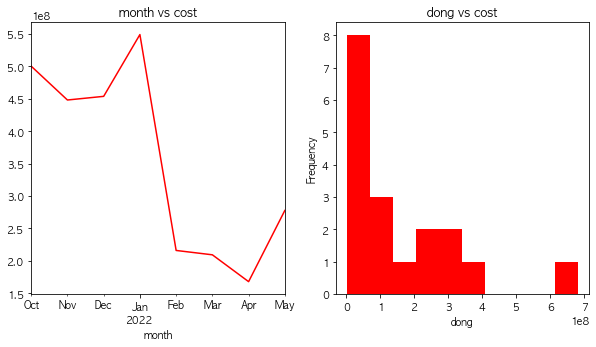

In [13]:
# 정규화 전
list = ['G', 'S', 'C', 'I', 'N', 'P', 'Q', 'L', 'R', 'F', 'J', 'O', 'H',
       'M', 'D', 'K']

df11 = df[df['code']=='N']
df11

f,ax = plt.subplots(1,2,figsize=(10,5))
df11.groupby('date')['cost'].sum().plot.line(ax=ax[0],color='Red')
df11.groupby('dong')['cost'].sum().plot.hist(ax=ax[1],color='Red')


ax[0].set_title('month vs cost')
ax[0].set_xlabel('month')


ax[1].set_title('dong vs cost')
ax[1].set_xlabel('dong')

Text(0.5, 0, 'dong')

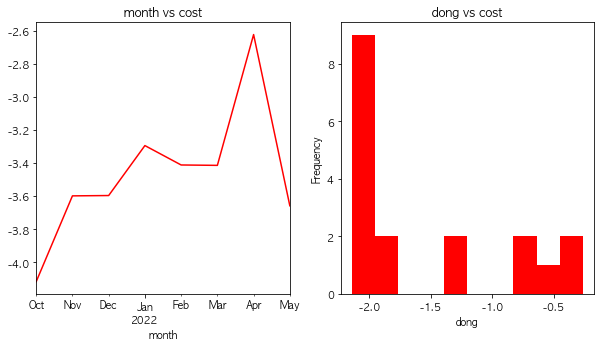

In [17]:
# 정규화 후

list = ['G', 'S', 'C', 'I', 'N', 'P', 'Q', 'L', 'R', 'F', 'J', 'O', 'H',
       'M', 'D', 'K']

df11 = df[df['code']=='N']
df11

f,ax = plt.subplots(1,2,figsize=(10,5))
df11.groupby('date')['cost'].sum().plot.line(ax=ax[0],color='Red')
df11.groupby('dong')['cost'].sum().plot.hist(ax=ax[1],color='Red')


ax[0].set_title('month vs cost')
ax[0].set_xlabel('month')


ax[1].set_title('dong vs cost')
ax[1].set_xlabel('dong')

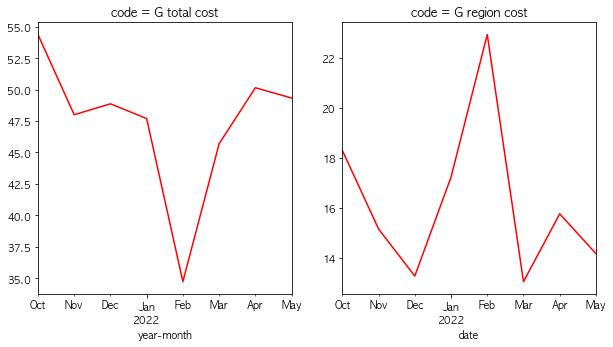

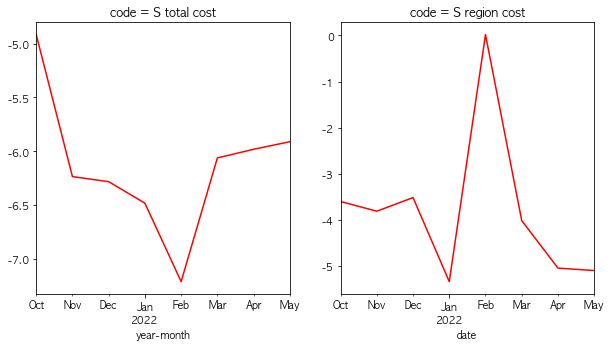

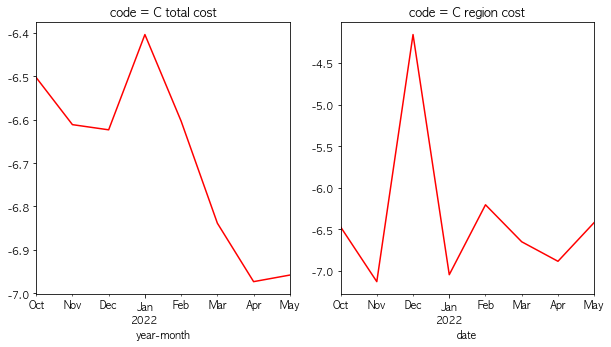

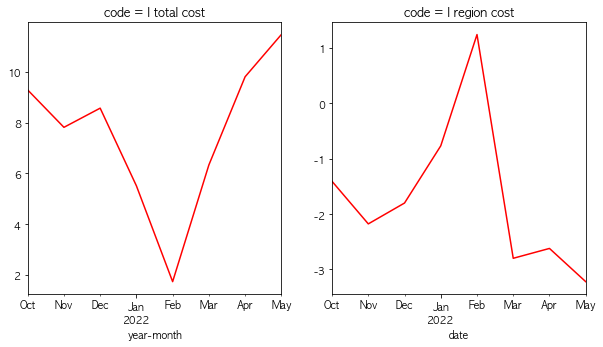

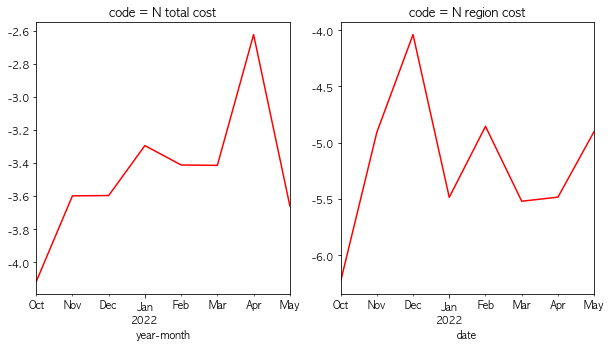

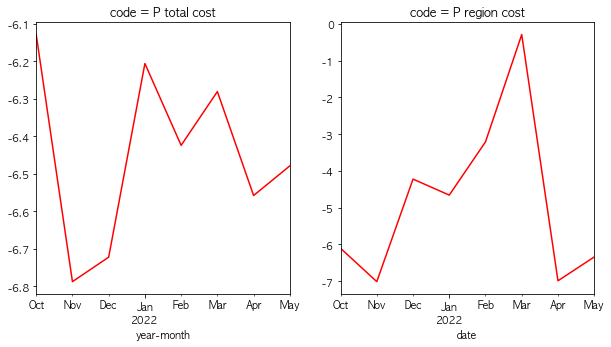

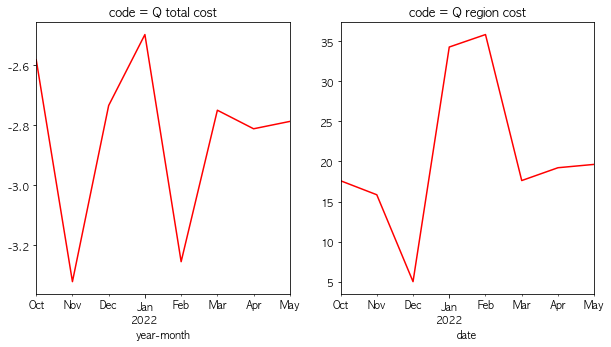

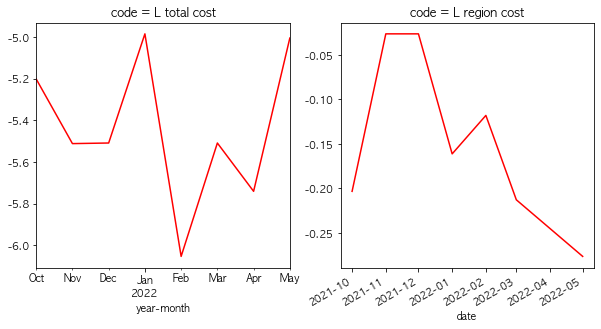

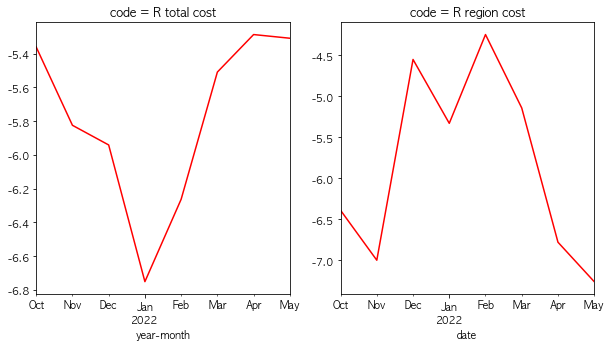

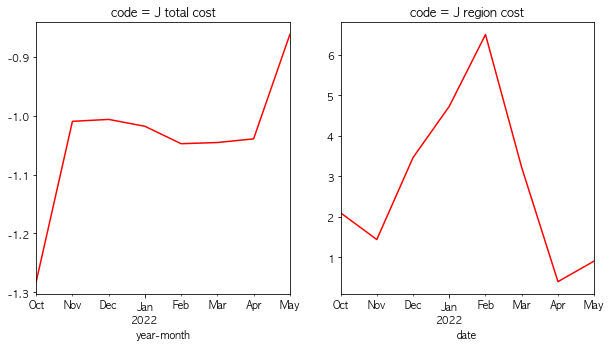

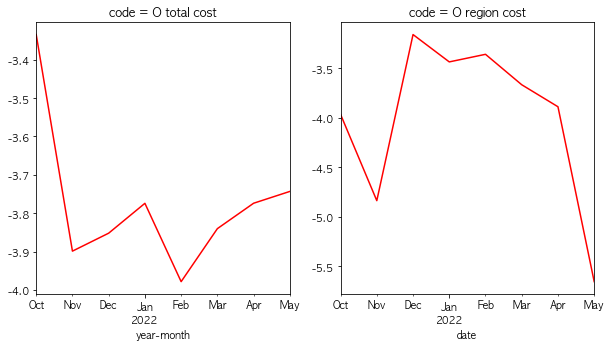

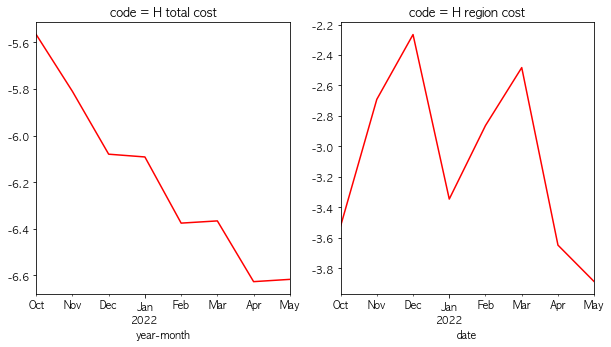

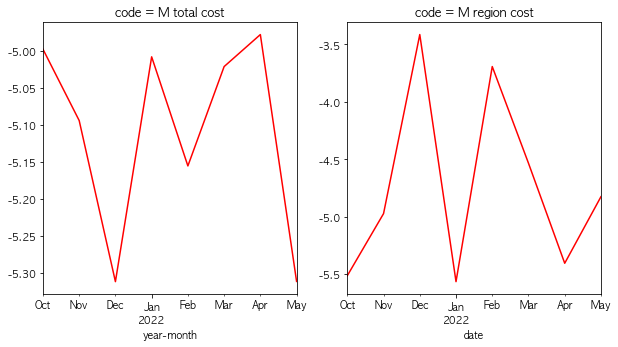

In [20]:
#정규화 전
list = list = ['G', 'S', 'C', 'I', 'N', 'P', 'Q', 'L', 'R', 'J', 'O', 'H','M']
for i in list:
    df111 = df[df['code']==i]
    df222 = df1[df1['code']==i]

    f,ax = plt.subplots(1,2,figsize=(10,5))
    df111.groupby('date')['cost'].sum().plot.line(ax=ax[0],color='Red')
    df222.groupby('date')['cost'].sum().plot.line(ax=ax[1],color='Red')
    #data11.groupby('dong')['cost'].sum().plot.hist(ax=ax[2],color='Red')
    #data22.groupby('dong')['cost'].sum().plot.hist(ax=ax[3],color='Red')

    ax[0].set_title(f'code = {i} total cost')
    ax[0].set_xlabel('year-month')


    ax[1].set_title(f'code = {i} region cost')
    ax[1].set_xlabel('date')

In [ ]:
list = list = ['G', 'S', 'C', 'I', 'N', 'P', 'Q', 'L', 'R', 'J', 'O', 'H','M']
for i in list:
    data11 = data1[data1['code']==i]
    data22 = data2[data2['code']==i]

    f,ax = plt.subplots(1,2,figsize=(10,5))
    data11.groupby('year-month')['cost'].sum().plot.line(ax=ax[0],color='Red')
    data22.groupby('year-month')['cost'].sum().plot.line(ax=ax[1],color='Red')
    #data11.groupby('dong')['cost'].sum().plot.hist(ax=ax[2],color='Red')
    #data22.groupby('dong')['cost'].sum().plot.hist(ax=ax[3],color='Red')

    ax[0].set_title(f'code = {i} total cost')
    ax[0].set_xlabel('year-month')


    ax[1].set_title(f'code = {i} region cost')
    ax[1].set_xlabel('year-month')